In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
from nltk.corpus import stopwords
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from datasets import Dataset

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
tweets_df = pd.read_csv("/content/data/data.csv")
tweets_df

,Sl no,Tweets,Search key,Feeling
0,1,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking...",happy moments,happy
1,2,"#2: @蓮花 &はすか ed ""RT @ninjaryugo: ＃コナモンの日 だそうで...",happy moments,happy
2,3,"#3: @Ris ♡ ed ""Happy birthday to one smokin h...",happy moments,happy
3,4,"#4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...",happy moments,happy
4,5,"#5: @Madhurima wth u vc♥ ed ""Good morning dea...",happy moments,happy
...,...,...,...,...
10012,10016,"Tweet #85: @Matteo tweeted ""@GameSpot @Frannkc...",irritating,angry
10013,10017,"Tweet #86: @𝐚𝐧𝐢𝐬𝐭𝐨𝐧 tweeted ""@BRATgiirl_ that’...",irritating,angry
10014,10018,"Tweet #87: @Chowkidar Ricky Sharma tweeted ""@M...",irritating,angry
10015,10019,"Tweet #88: @Katoe.EXE tweeted ""u know what i h...",irritating,angry


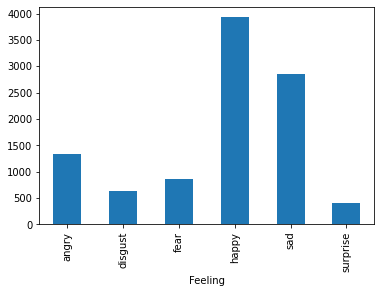

In [ ]:
tweets_df.groupby(['Feeling']).size().plot.bar()


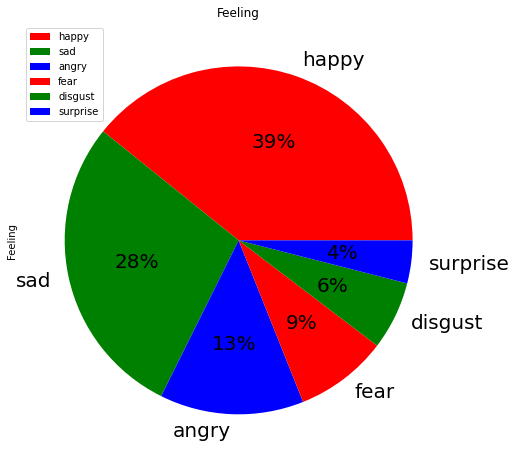

In [ ]:
#data analysis and cleaning 

tweets_df['Feeling'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(8,8), fontsize=20, title='Feeling', legend=True, colors=['red', 'green', 'blue'])



In [ ]:


def remove_url(text):
    return re.sub(r"http\S+", "", text)

def remove_punctuation(text):
    """Remove punctuation"""
    translator = str.maketrans("","",string.punctuation)
    return text.translate(translator)

stop = set(stopwords.words("english"))
def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

def remove_numbers(text):
    filtered_words = [i for i in text.split() if not i.isdigit()]
    return " ".join(filtered_words)

stop_words = ["ed","rt","tweet","tweeted"]
def remove_freq(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(filtered_words)

def remove_non_latin(text):
    return re.sub(r'[^\x00-\x7F]+','', text)



In [ ]:
#apply the functions to the dataframe
tweets_df['Tweets'] = tweets_df['Tweets'].apply(remove_url)
tweets_df['Tweets'] = tweets_df['Tweets'].apply(remove_punctuation)
tweets_df['Tweets'] = tweets_df['Tweets'].apply(remove_stopwords)
tweets_df['Tweets'] = tweets_df['Tweets'].apply(remove_numbers)
tweets_df['Tweets'] = tweets_df['Tweets'].apply(remove_freq)
tweets_df['Tweets'] = tweets_df['Tweets'].apply(remove_non_latin)
tweets_df['Tweets'] = tweets_df['Tweets'].str.replace('\d+', '')

<ipython-input-7-489905a24a86>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_df['Tweets'] = tweets_df['Tweets'].str.replace('\d+', '')


In [ ]:
# Use English stemmer.
stemmer = SnowballStemmer("english")

tweets_df['tokenized'] = tweets_df.apply(lambda row: nltk.word_tokenize(row['Tweets']), axis=1)


In [ ]:
# keep only english words from tokenized column
words = set(nltk.corpus.words.words())
tweets_df['tokenized'] = tweets_df['tokenized'].apply(lambda x: [item for item in x if item in words])

tweets_df 

,Sl no,Tweets,Search key,Feeling,tokenized
0,1,fe mirayadizon time ticking fast relive past h...,happy moments,happy,"[fe, time, ticking, fast, relive, past, happy,..."
1,2,ninjaryugo,happy moments,happy,[]
2,3,ris happy birthday one smokin hot mama love ...,happy moments,happy,"[happy, birthday, one, hot, love, much, amazin..."
3,4,jwinnie best cheer jwinnie omg left min msgs...,happy moments,happy,"[best, cheer, left, min, cant, save, em, happy..."
4,5,madhurima wth u vc good morning dear vikramcha...,happy moments,happy,"[u, good, morning, dear, wishing, day, filled,..."
...,...,...,...,...,...
10012,10016,matteo gamespot frannkchesco eastarwars contro...,irritating,angry,"[controversy, know, expect, kind, corporate, p..."
10013,10017,bratgiirl thats irritating wish people cared...,irritating,angry,"[thats, irritating, wish, people]"
10014,10018,chowkidar ricky sharma mamataofficial g aapne ...,irritating,angry,"[g, paar, di, absolutely, wrong, person, sorry..."
10015,10019,katoeexe u know hate indie alternative whateve...,irritating,angry,"[u, know, hate, alternative, whatever, genre, ..."


In [ ]:
# Use English stemmer.
stemmer = SnowballStemmer("english")

tweets_df['stemmed'] = tweets_df['tokenized'].apply(lambda x: [stemmer.stem(y) for y in x])
tweets_df['stemmed'] = tweets_df.apply(lambda row: TreebankWordDetokenizer().detokenize(row['stemmed']), axis=1)
tweets_df

,Sl no,Tweets,Search key,Feeling,tokenized,stemmed
0,1,fe mirayadizon time ticking fast relive past h...,happy moments,happy,"[fe, time, ticking, fast, relive, past, happy,...",fe time tick fast reliv past happi joy face
1,2,ninjaryugo,happy moments,happy,[],
2,3,ris happy birthday one smokin hot mama love ...,happy moments,happy,"[happy, birthday, one, hot, love, much, amazin...",happi birthday one hot love much amaz friend a...
3,4,jwinnie best cheer jwinnie omg left min msgs...,happy moments,happy,"[best, cheer, left, min, cant, save, em, happy...",best cheer left min cant save em happi like tr...
4,5,madhurima wth u vc good morning dear vikramcha...,happy moments,happy,"[u, good, morning, dear, wishing, day, filled,...",u good morn dear wish day fill sunshin happi l...
...,...,...,...,...,...,...
10012,10016,matteo gamespot frannkchesco eastarwars contro...,irritating,angry,"[controversy, know, expect, kind, corporate, p...",controversi know expect kind corpor point stil...
10013,10017,bratgiirl thats irritating wish people cared...,irritating,angry,"[thats, irritating, wish, people]",that irrit wish peopl
10014,10018,chowkidar ricky sharma mamataofficial g aapne ...,irritating,angry,"[g, paar, di, absolutely, wrong, person, sorry...",g paar di absolut wrong person sorri say irrit
10015,10019,katoeexe u know hate indie alternative whateve...,irritating,angry,"[u, know, hate, alternative, whatever, genre, ...",u know hate altern whatev genr music that deep...


In [ ]:
dataset = Dataset.from_pandas(tweets_df)


In [ ]:
dataset

Dataset({
    features: ['Sl no', 'Tweets', 'Search key', 'Feeling', 'tokenized', 'stemmed'],
    num_rows: 10017
})

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [ ]:
def transform_labels(label):

    label = label['Feeling']
    num = 0
    if label == 'happy':
        num = 0
    elif label == 'sad':
        num = 1
    elif label == 'angry':
        num = 2
    elif label == 'fear':
        num = 3
    elif label == 'disgust':
        num = 4
    elif label == 'surprise':
        num = 5

    return {'labels': num}

def tokenize_data(example):
    return tokenizer(example['stemmed'], padding='max_length')

dataset = dataset.map(tokenize_data, batched=True)

remove_columns = ['Search key']
dataset = dataset.map(transform_labels, remove_columns=remove_columns)

  0%|          | 0/11 [00:00<?, ?ba/s]

  0%|          | 0/10017 [00:00<?, ?ex/s]

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments("test_trainer", num_train_epochs=10)

In [ ]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=6)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [ ]:
train_dataset = dataset.shuffle(seed=10).select(range(9016))
eval_dataset = dataset.shuffle(seed=10).select(range(9017, 10017))

In [ ]:
from transformers import Trainer
compute_metrics = lambda x: {'accuracy': (x.predictions.argmax(-1) == x.label_ids).mean().item()}

trainer = Trainer(
    model=model, args=training_args, train_dataset=train_dataset, eval_dataset=eval_dataset, compute_metrics=compute_metrics
)

In [ ]:
trainer.train()


The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: Feeling, Sl no, tokenized, stemmed, Tweets. If Feeling, Sl no, tokenized, stemmed, Tweets are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 9016
  Num Epochs = 10
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 11270
  Number of trainable parameters = 108314886


Step,Training Loss
500,1.136700
1000,0.648400
1500,0.538800
2000,0.520300
2500,0.428800
3000,0.375300
3500,0.371400
4000,0.270000
4500,0.310500
5000,0.233200


Saving model checkpoint to test_trainer/checkpoint-500
Configuration saved in test_trainer/checkpoint-500/config.json
Model weights saved in test_trainer/checkpoint-500/pytorch_model.bin
Saving model checkpoint to test_trainer/checkpoint-1000
Configuration saved in test_trainer/checkpoint-1000/config.json
Model weights saved in test_trainer/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to test_trainer/checkpoint-1500
Configuration saved in test_trainer/checkpoint-1500/config.json
Model weights saved in test_trainer/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to test_trainer/checkpoint-2000
Configuration saved in test_trainer/checkpoint-2000/config.json
Model weights saved in test_trainer/checkpoint-2000/pytorch_model.bin
Saving model checkpoint to test_trainer/checkpoint-2500
Configuration saved in test_trainer/checkpoint-2500/config.json
Model weights saved in test_trainer/checkpoint-2500/pytorch_model.bin
Saving model checkpoint to test_trainer/checkpoint-30

TrainOutput(global_step=11270, training_loss=0.29231701184926884, metrics={'train_runtime': 8312.8725, 'train_samples_per_second': 10.846, 'train_steps_per_second': 1.356, 'total_flos': 2.372294471565312e+16, 'train_loss': 0.29231701184926884, 'epoch': 10.0})

In [ ]:
#metrics
trainer.evaluate()


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: Feeling, Sl no, tokenized, stemmed, Tweets. If Feeling, Sl no, tokenized, stemmed, Tweets are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1000
  Batch size = 8


{'eval_loss': 0.9105311036109924,
 'eval_accuracy': 0.859,
 'eval_runtime': 31.9833,
 'eval_samples_per_second': 31.266,
 'eval_steps_per_second': 3.908,
 'epoch': 10.0}